# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Colllection and Processsing

In [2]:
# loading the data from cs file to pandas dataframe
df = pd.read_csv('car data.csv')

In [3]:
# first 5 rows of dataframe
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking the no. of rows and column
df.shape

(301, 9)

In [5]:
# getting some information about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking no. of missing values 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the distribution of categorical data

print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding the categorical data


In [8]:
# encoding for Fuel_type col
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace = True)

# for seller type col
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace = True)

# encoding for Transmission column
df.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace = True)


In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting the data and Target

In [10]:
X = df.drop(['Car_Name','Selling_Price'],axis = 1)
Y = df['Selling_Price']

In [11]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [12]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Splitting Training and Test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

## Model Traning

## 1) Linear Regression

In [14]:
# loading the linear regresssion model
lin_reg_model = LinearRegression()

In [15]:
# fit function used to train our model
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

## Model Evaluation

In [16]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)
# it gives predicted value of y

In [17]:
# comapare predicted value with actual Y_train value
# R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction,)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493708


## Visualize the actual prices and Predicted prices

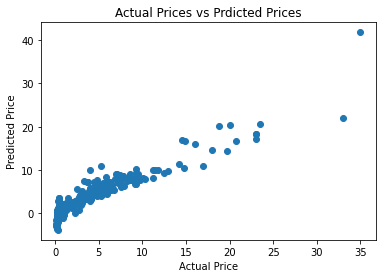

In [18]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Prdicted Prices")
plt.show()

In [19]:
# from graph our prdicted prices are close to actual prices so our model is good

In [20]:
# prediction on Testing  data
testing_data_prediction = lin_reg_model.predict(X_test)
# it gives predicted value of y for test data

In [21]:
# comapare predicted value with actual Y_test value
# R squared Error
error_score = metrics.r2_score(Y_test,testing_data_prediction,)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715026374


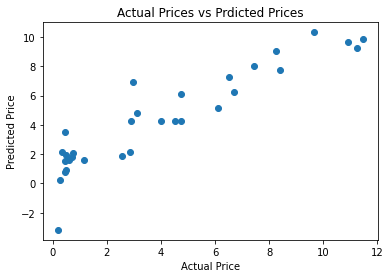

In [22]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Prdicted Prices")
plt.show()

## 2) Lasso Regression

In [23]:
# loading the linear regresssion model
lass_reg_model = Lasso()

In [24]:
# fit function used to train our model
lass_reg_model.fit(X_train,Y_train)

Lasso()

## Model Evaluation

In [25]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)
# it gives predicted value of y

In [26]:
# comapare predicted value with actual Y_train value
# R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction,)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


## Visualize the actual prices and Predicted prices

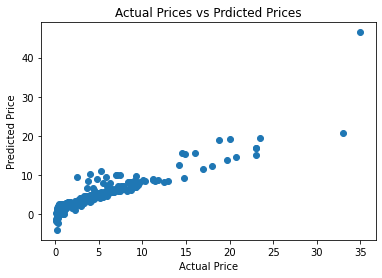

In [27]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Prdicted Prices")
plt.show()

In [28]:
# from graph our prdicted prices are close to actual prices so our model is good

In [29]:
# prediction on Testing  data
testing_data_prediction = lass_reg_model.predict(X_test)
# it gives predicted value of y for test data

In [30]:
# comapare predicted value with actual Y_test value
# R squared Error
error_score = metrics.r2_score(Y_test,testing_data_prediction,)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


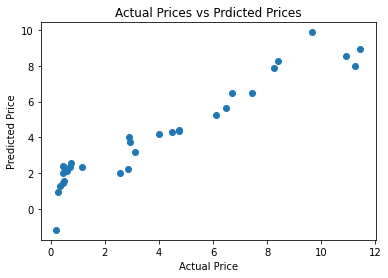

In [31]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Prdicted Prices")
plt.show()